Melhor solução encontrada: [1, 1, 1, 1]
Valor da melhor solução: 45


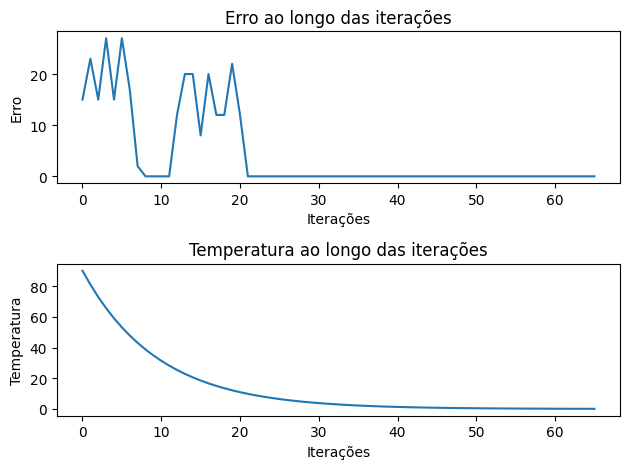

In [8]:
import random
import math
import matplotlib.pyplot as plt

# Definição dos itens disponíveis
items = [
    {"weight": 2, "value": 10},
    {"weight": 3, "value": 15},
    {"weight": 5, "value": 8},
    {"weight": 6, "value": 12}
]

# Parâmetros do problema
max_capacity = 16

# Parâmetros do Simulated Annealing
initial_temperature = 100
final_temperature = 0.1
cooling_rate = 0.9

# Função de avaliação
def evaluate_solution(solution):
    total_value = 0
    total_weight = 0

    for i in range(len(solution)):
        if solution[i] == 1:  # Item selecionado
            total_value += items[i]["value"]
            total_weight += items[i]["weight"]

    if total_weight > max_capacity:
        return 0  # Penalizar soluções inválidas

    return total_value

# Inicialização
current_solution = [random.randint(0, 1) for _ in range(len(items))]
best_solution = current_solution.copy()
best_value = evaluate_solution(best_solution)

# Simulated Annealing
temperature = initial_temperature
error_list = []  # Lista para armazenar os erros ao longo das iterações
temperature_list = []  # Lista para armazenar as temperaturas ao longo das iterações

while temperature > final_temperature:
    # Gere uma nova solução vizinha
    neighbor_solution = current_solution.copy()
    index = random.randint(0, len(current_solution) - 1)
    neighbor_solution[index] = 1 - neighbor_solution[index]  # Troca entre selecionado e não selecionado

    # Calcule o valor da nova solução vizinha
    neighbor_value = evaluate_solution(neighbor_solution)

    # Calcule a diferença de valor entre a nova solução vizinha e a solução atual
    delta_value = neighbor_value - evaluate_solution(current_solution)

    # Verifique se a nova solução vizinha é melhor
    if delta_value > 0:
        current_solution = neighbor_solution.copy()
        if neighbor_value > best_value:
            best_solution = neighbor_solution.copy()
            best_value = neighbor_value
    else:
        # Aceite a nova solução vizinha com uma probabilidade dependente da diferença de valor e da temperatura atual
        probability = math.exp(delta_value / temperature)
        if random.random() < probability:
            current_solution = neighbor_solution.copy()

    # Reduza a temperatura
    temperature *= cooling_rate

    # Calcule o erro e adicione à lista
    error = best_value - evaluate_solution(current_solution)
    error_list.append(error)

    # Adicione a temperatura à lista
    temperature_list.append(temperature)

# Resultados
print("Melhor solução encontrada:", best_solution)
print("Valor da melhor solução:", best_value)

# Gráfico de erros
plt.subplot(2, 1, 1)
plt.plot(error_list)
plt.xlabel('Iterações')
plt.ylabel('Erro')
plt.title('Erro ao longo das iterações')

# Gráfico de temperatura
plt.subplot(2, 1, 2)
plt.plot(temperature_list)
plt.xlabel('Iterações')
plt.ylabel('Temperatura')
plt.title('Temperatura ao longo das iterações')

plt.tight_layout()
plt.show()
